Need to address:
1. Are there significant hours of the day, and days of the week, on which accidents occur?
2. For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We
suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.
3. For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?
4. Using the apriori algorithm, explore the impact of selected variables on accident severity.
5. Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region?
6. Using outlier detection methods, identify unusual entries in your data set. Should you keep these entries in your data?
7. Prediction by Classification Model.



In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Dataset_Traffic.csv')
# Inspect the data
print(df.head(10))




   vehicle_index accident_index  accident_year accident_reference  \
0         681728       2.02E+12           2020           10228020   
1         681749       2.02E+12           2020           10228086   
2         681752       2.02E+12           2020           10228097   
3         681774       2.02E+12           2020           10228148   
4         681793       2.02E+12           2020           10228207   
5         681806       2.02E+12           2020           10228240   
6         681808       2.02E+12           2020           10228247   
7         681812       2.02E+12           2020           10228250   
8         681822       2.02E+12           2020           10228265   
9         681835       2.02E+12           2020           10228283   

   vehicle_reference  vehicle_type  towing_and_articulation  \
0                  1             3                        0   
1                  1             3                        0   
2                  2             3                 

In [43]:
#Import modules
import numpy as np
import holidays
import pandas as pd
import seaborn as sns
import pickle
import time
import timeit


import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

import datetime
import math
from collections import Counter



In [44]:
print(df.columns)

Index(['vehicle_index', 'accident_index', 'accident_year',
       'accident_reference', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type', 'accident_index.1', 'accident_year.1',
       'accident_reference.1', 'location_easting_osgr',
       'location_northing_osgr', 'longitude', 'latitude', 'police_force',
       'accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'date', 'day_of_we

Following parameter have been selected for data analysis that is fulfilling the requirement of the task.
As there are 90 columns in the extracted dataset.


In [45]:
# Selecting specific columns
vehicle_data = [
   'vehicle_index', 'accident_index', 'accident_year',
       'accident_reference', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type'
    ]
#'casualty_index', 'casualty_severity', 'shape__area', 'shape__length', 'globalid'

# Selecting the columns
df_vehicle = df[vehicle_data]

# Display the selected columns
print(df_vehicle)

       vehicle_index accident_index  accident_year accident_reference  \
0             681728       2.02E+12           2020           10228020   
1             681749       2.02E+12           2020           10228086   
2             681752       2.02E+12           2020           10228097   
3             681774       2.02E+12           2020           10228148   
4             681793       2.02E+12           2020           10228207   
...              ...            ...            ...                ...   
13194         842417  202063D065020           2020          63D065020   
13195         842417  202063D065020           2020          63D065020   
13196         842437  202063D070420           2020          63D070420   
13197         842465  202063D080920           2020          63D080920   
13198         842487  202063D084820           2020          63D084820   

       vehicle_reference  vehicle_type  towing_and_articulation  \
0                      1             3                  

In [46]:
# Selecting specific columns
accident_data = [
   'accident_index.1', 'accident_year.1',
       'accident_reference.1', 'location_easting_osgr',
       'location_northing_osgr', 'longitude', 'latitude', 'police_force',
       'accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'date', 'day_of_week', 'time', 'local_authority_district',
       'local_authority_ons_district', 'local_authority_highway',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'
    ]


# Selecting the columns
df_accident = df[accident_data]

# Display the selected columns
print(df_accident)






      accident_index.1  accident_year.1 accident_reference.1  \
0             2.02E+12             2020             10228020   
1             2.02E+12             2020             10228086   
2             2.02E+12             2020             10228097   
3             2.02E+12             2020             10228148   
4             2.02E+12             2020             10228207   
...                ...              ...                  ...   
13194    202063D065020             2020            63D065020   
13195    202063D065020             2020            63D065020   
13196    202063D070420             2020            63D070420   
13197    202063D080920             2020            63D080920   
13198    202063D084820             2020            63D084820   

       location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                     529718                  192342  -0.127840  51.614971   
1                     531043                  176304  -0.114680  51.470537 

In [47]:
# Selecting specific columns
casualty_data = [
   'casualty_index',
       'accident_index.2', 'accident_year.2', 'accident_reference.2',
       'vehicle_reference.1', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile'
    ]


# Selecting the columns
df_casualty = df[casualty_data]

# Display the selected columns
print(df_casualty)




       casualty_index accident_index.2  accident_year.2 accident_reference.2  \
0              484759         2.02E+12             2020             10228020   
1              484775         2.02E+12             2020             10228086   
2              484778         2.02E+12             2020             10228097   
3              484793         2.02E+12             2020             10228148   
4              484806         2.02E+12             2020             10228207   
...               ...              ...              ...                  ...   
13194          595265    202063D065020             2020            63D065020   
13195          595266    202063D065020             2020            63D065020   
13196          595280    202063D070420             2020            63D070420   
13197          595303    202063D080920             2020            63D080920   
13198          595321    202063D084820             2020            63D084820   

       vehicle_reference.1  casualty_re

In [48]:
# Selecting specific columns
lsoa_data = [
   'objectid','lsoa01cd', 'lsoa01nm', 'lsoa01nmw', 'shape__area', 'shape__length','globalid'
    ]


# Selecting the columns
df_lsoa = df[lsoa_data]

# Display the selected columns
print(df_lsoa)




       objectid   lsoa01cd          lsoa01nm         lsoa01nmw   shape__area  \
0          1530  E01001530      Enfield 032D      Enfield 032D  2.086097e+05   
1          3186  E01003186      Lambeth 007D      Lambeth 007D  2.087291e+05   
2          4761  E01004761  Westminster 018D  Westminster 018D  5.200770e+05   
3           635  E01000635        Brent 020D        Brent 020D  2.324997e+05   
4          3371  E01003371       Merton 005D       Merton 005D  1.209722e+05   
...         ...        ...               ...               ...           ...   
13194     32979  W01000497        Powys 005D        Powys 005D  3.213897e+07   
13195     32979  W01000497        Powys 005D        Powys 005D  3.213897e+07   
13196     32929  W01000447        Powys 007C        Powys 007C  8.820772e+07   
13197     32981  W01000499        Powys 003B        Powys 003B  1.844787e+06   
13198     32947  W01000465        Powys 018E        Powys 018E  4.947259e+07   

       shape__length                   

In [49]:
print('Dataset Shape', df.shape)

Dataset Shape (13199, 90)


In [50]:
print(df_accident.shape)
print(df_lsoa.shape)
print(df_casualty.shape)
print(df_vehicle.shape)


(13199, 36)
(13199, 7)
(13199, 19)
(13199, 28)


Cleaning of data

In [51]:
#drop following duplicate columns
#because they are the keys in other tables



duplicate_columns = ['accident_index.1', 'lsoa01cd', 'accident_index.2', 'accident_year.2',
                   'accident_reference.2', 'vehicle_reference.1', 'accident_year.1', 'accident_reference.1']

df = df.drop(columns=duplicate_columns)




In [52]:
#convert date/time to datetime datatype
df['date'] = pd.to_datetime(df['date'])
print(df.date)

0       2020-01-01
1       2020-01-01
2       2020-01-01
3       2020-01-01
4       2020-01-01
           ...    
13194   2020-09-20
13195   2020-09-20
13196   2020-11-10
13197   2020-11-27
13198   2020-12-12
Name: date, Length: 13199, dtype: datetime64[ns]


In [53]:
#Folloing dataTypes are miss typed

df[['driver_imd_decile','second_road_number', 'pedestrian_crossing_physical_facilities',
   'pedestrian_crossing-human_control','did_police_officer_attend_scene_of_accident',
    'vehicle_reference','vehicle_location_restricted_lane','first_road_number']]= df[['driver_imd_decile','second_road_number',
    'pedestrian_crossing_physical_facilities',
   'pedestrian_crossing_human_control','did_police_officer_attend_scene_of_accident',
    'vehicle_reference','vehicle_location_restricted_lane','first_road_number']].astype('object')


In [54]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['vehicle_index', 'accident_year', 'vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to', 'junction_location', 'skidding_and_overturning', 'hit_object_in_carriageway', 'vehicle_leaving_carriageway', 'hit_object_off_carriageway', 'first_point_of_impact', 'vehicle_left_hand_drive', 'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver', 'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code', 'age_of_vehicle', 'driver_home_area_type', 'location_easting_osgr', 'location_northing_osgr', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'day_of_week', 'local_authority_district', 'first_road_class', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'pedestrian_crossing_human_control', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'trunk_road_flag

In [55]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

vehicle_index                                  0.0
casualty_reference                             0.0
lsoa_of_accident_location                      0.0
trunk_road_flag                                0.0
did_police_officer_attend_scene_of_accident    0.0
                                              ... 
driver_imd_decile                              0.0
generic_make_model                             0.0
age_of_vehicle                                 0.0
propulsion_code                                0.0
pedestrian_crossing-human_control              0.0
Length: 83, dtype: float64

In [56]:

#scipy
import scipy.stats as stats
from scipy import stats
from scipy.stats import chi2_contingency

#sklearn
import sklearn
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder


#for clustering
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA


#other learners
from xgboost import XGBClassifier
import lightgbm as lgb

#imblearn
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

#webscraping
import re
import urllib
from IPython.core.display import HTML
import requests
from bs4 import BeautifulSoup


#time series
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams
import itertools
from statsmodels.tsa.stattools import adfuller

#warning ignorer
import warnings
warnings.filterwarnings("ignore")



In [57]:
df['age_of_vehicle'].describe()

count    13199.000000
mean         6.548754
std          7.589085
min         -1.000000
25%          1.000000
50%          4.000000
75%         10.000000
max         78.000000
Name: age_of_vehicle, dtype: float64

In [58]:
#engine_capacity_cc
df['engine_capacity_cc'].describe()

count    13199.000000
mean       352.163800
std        396.636771
min         -1.000000
25%        124.000000
50%        125.000000
75%        600.000000
max       7817.000000
Name: engine_capacity_cc, dtype: float64

In [59]:
# Group by 'date' and 'time' and count the number of occurrences
accidents_count = df.groupby(['date', 'day_of_week']).size().reset_index(name='accident_count')

# Print the result
print(accidents_count)

          date  day_of_week  accident_count
0   2020-01-01            4              11
1   2020-01-02            7              27
2   2020-01-03            1              33
3   2020-01-04            4              10
4   2020-01-05            6              18
..         ...          ...             ...
361 2020-12-27            1              18
362 2020-12-28            2              18
363 2020-12-29            3              13
364 2020-12-30            4              21
365 2020-12-31            5              24

[366 rows x 3 columns]


Monthly Analysis of Accidents:

<Axes: title={'center': 'Accidents per Month'}, xlabel='Month', ylabel='Number of Accidents'>

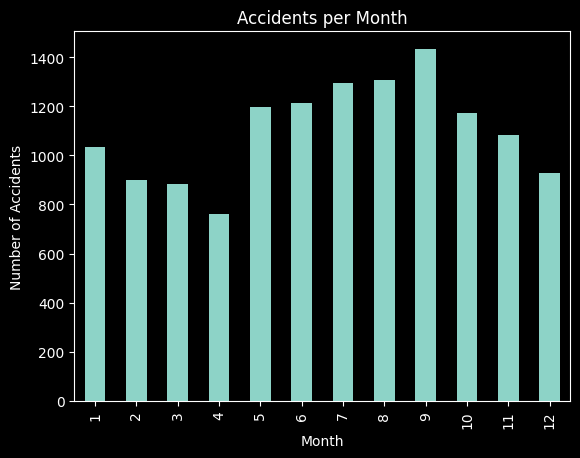

In [60]:
df['month'] = df['date'].dt.month



# the number of accidents in each month
accidents_per_month = df['month'].value_counts().sort_index()

# Plot the data
accidents_per_month.plot(kind='bar', xlabel='Month', ylabel='Number of Accidents', title='Accidents per Month')

In [61]:
counts = df['vehicle_type'].value_counts()

# Print the counts
for value, count in counts.items():
    print(f"Type {value}: {count} occurrences")

Type 3: 7496 occurrences
Type 5: 3973 occurrences
Type 4: 1730 occurrences


Task:1 Are there significant hours of the day, and days of the week, on which accidents occur?


<Axes: title={'center': 'Accidents by Day of Week'}, xlabel='Day of Week', ylabel='Number of Accidents'>

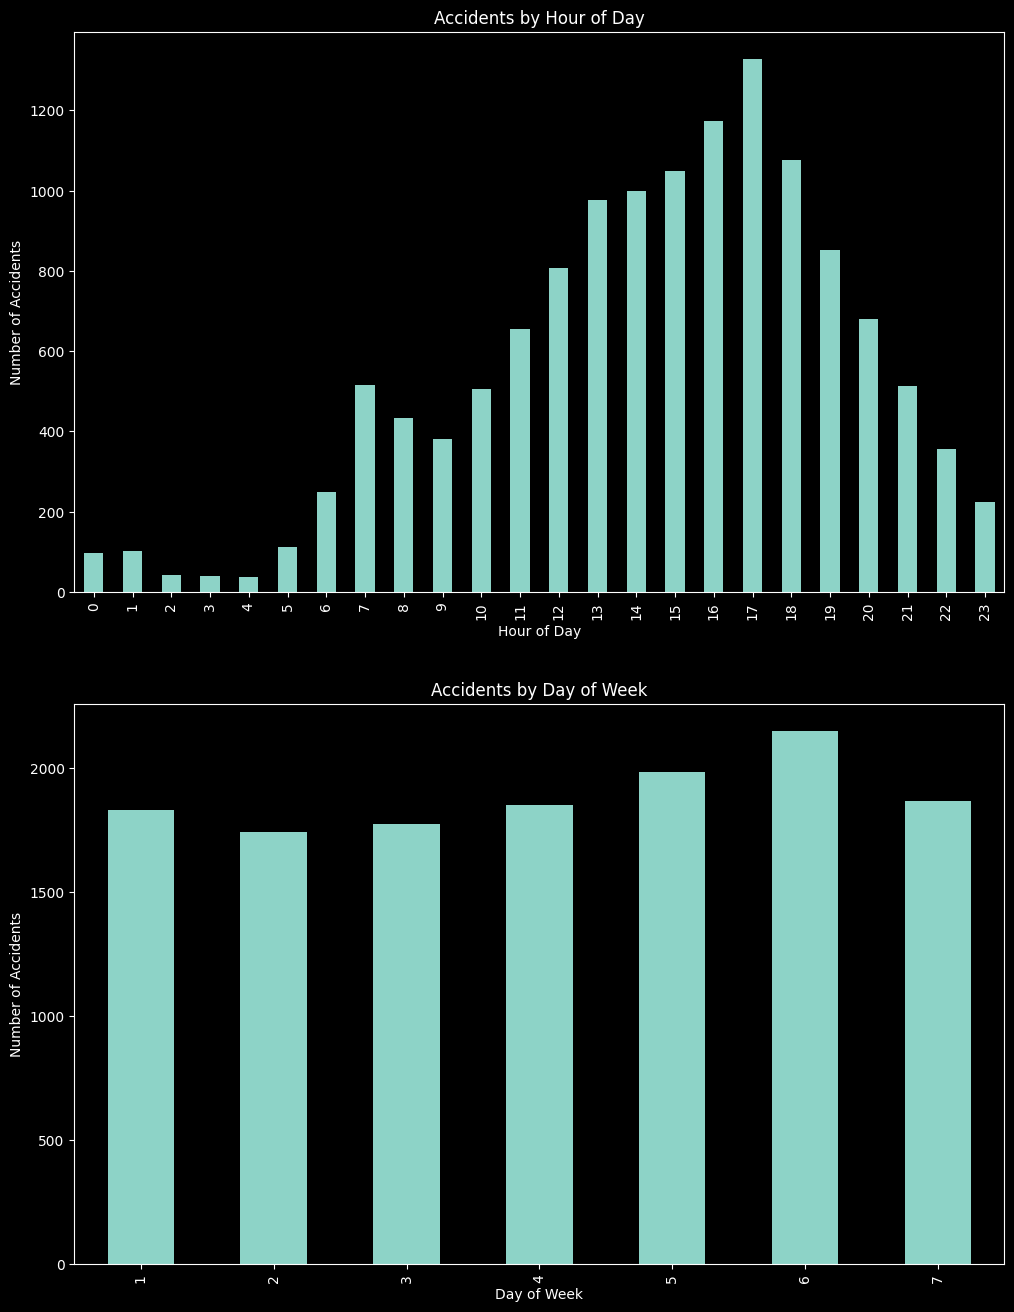

In [62]:
df['time'] = pd.to_datetime(df['time'])

# Extract hour and day of the week from the 'time' column
df['hour'] = df['time'].dt.hour


# Group the data by hour and day of the week and count the number of accidents
hourly_counts = df.groupby('hour').size()
daily_counts = df.groupby('day_of_week').size()

# Plot the data
fig, axs = plt.subplots(2, 1, figsize=(12, 16))

hourly_counts.plot(kind='bar', ax=axs[0], xlabel='Hour of Day', ylabel='Number of Accidents', title='Accidents by Hour of Day')
daily_counts.plot(kind='bar', ax=axs[1], xlabel='Day of Week', ylabel='Number of Accidents', title='Accidents by Day of Week')

Task 2: For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.


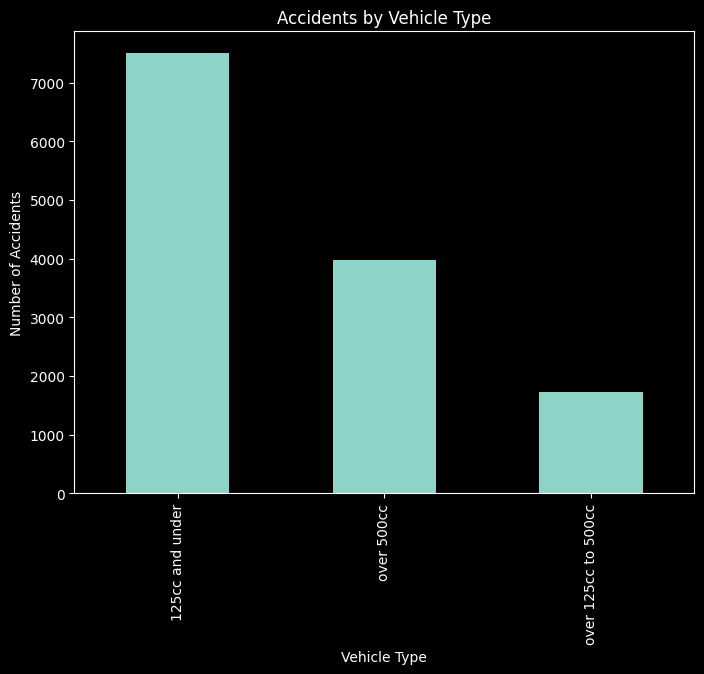

In [63]:
vehicle_type_mapping = {3: '125cc and under', 4: 'over 125cc to 500cc', 5: 'over 500cc'}


df['vehicle_type'] = df['vehicle_type'].replace(vehicle_type_mapping)

# Count the number of occurrences of each vehicle type
counts = df['vehicle_type'].value_counts()

# Plot the data
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', xlabel='Vehicle Type', ylabel='Number of Accidents', title='Accidents by Vehicle Type')
plt.show()

Task 3: For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

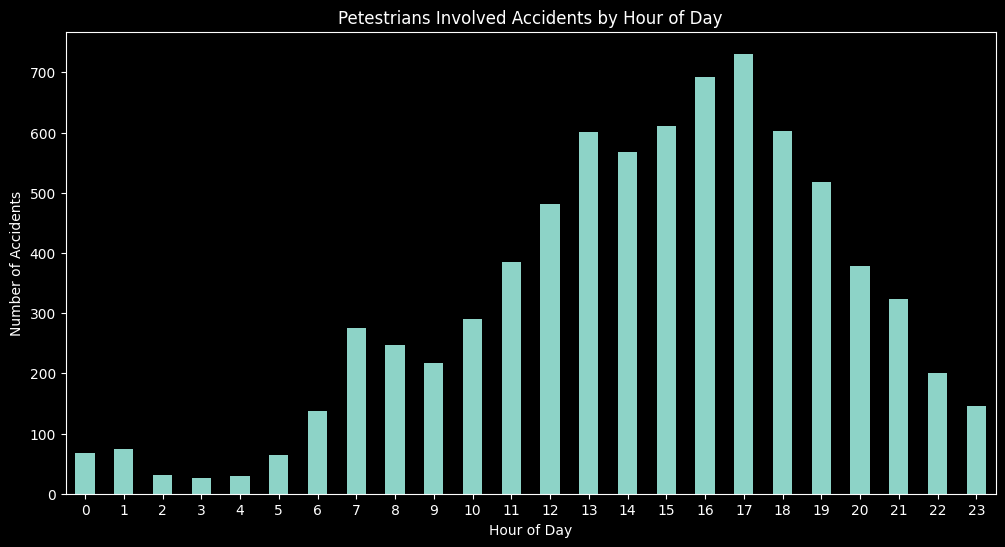

In [64]:

# Create a plot for accidents by hour of the day
plt.figure(figsize=(12, 6))
df[df['vehicle_reference'] == 1]['hour'].value_counts().sort_index().plot(kind='bar', xlabel='Hour of Day', ylabel='Number of Accidents', title='Petestrians Involved Accidents by Hour of Day')
plt.xticks(rotation=0)
plt.show()




<Axes: title={'center': 'Petestrians Involved Accidents by Day of Week'}, xlabel='Day of Week', ylabel='Number of Accidents'>

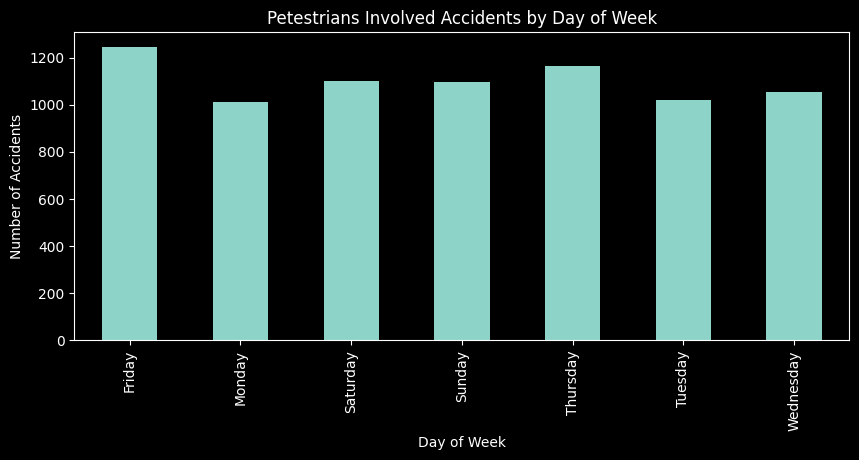

In [65]:
# Map day of the week to names
day_map = {1: 'Sunday',2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}

# Create a plot for accidents by day of the week
plt.figure(figsize=(10, 4))
df[df['vehicle_reference'] == 1]['day_of_week'].map(day_map).value_counts().sort_index().plot(kind='bar', xlabel='Day of Week', ylabel='Number of Accidents', title='Petestrians Involved Accidents by Day of Week')



Applying Apriori Algorithm:

In [66]:

import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [67]:
selected_veriables = ['time', 'date', 'day_of_week', 'vehicle_reference', 'vehicle_type']
df_selected = df[selected_veriables]
print(df_selected)

                     time       date  day_of_week vehicle_reference  \
0     2024-02-24 03:25:00 2020-01-01            4                 1   
1     2024-02-24 14:00:00 2020-01-01            4                 1   
2     2024-02-24 14:37:00 2020-01-01            4                 2   
3     2024-02-24 19:05:00 2020-01-01            4                 1   
4     2024-02-24 14:29:00 2020-01-01            4                 1   
...                   ...        ...          ...               ...   
13194 2024-02-24 12:27:00 2020-09-20            1                 2   
13195 2024-02-24 12:27:00 2020-09-20            1                 2   
13196 2024-02-24 15:05:00 2020-11-10            1                 1   
13197 2024-02-24 17:00:00 2020-11-27            6                 1   
13198 2024-02-24 14:50:00 2020-12-12            7                 1   

          vehicle_type  
0      125cc and under  
1      125cc and under  
2      125cc and under  
3      125cc and under  
4      125cc and under

In [68]:
#scipy
import scipy.stats as stats
from scipy import stats
from scipy.stats import chi2_contingency

#sklearn
import sklearn
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, log_loss, recall_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

#for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

#other learners
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


#imblearn
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

#webscraping
import requests
from bs4 import BeautifulSoup
import re
import urllib
from IPython.core.display import HTML

#time series
import statsmodels.api as sm
from pylab import rcParams
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA


#warning ignorer
import warnings
warnings.filterwarnings("ignore")

In [69]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Dataset_Traffic.csv')
# Inspect the data
print(df.head(10))

   vehicle_index accident_index  accident_year accident_reference  \
0         681728       2.02E+12           2020           10228020   
1         681749       2.02E+12           2020           10228086   
2         681752       2.02E+12           2020           10228097   
3         681774       2.02E+12           2020           10228148   
4         681793       2.02E+12           2020           10228207   
5         681806       2.02E+12           2020           10228240   
6         681808       2.02E+12           2020           10228247   
7         681812       2.02E+12           2020           10228250   
8         681822       2.02E+12           2020           10228265   
9         681835       2.02E+12           2020           10228283   

   vehicle_reference  vehicle_type  towing_and_articulation  \
0                  1             3                        0   
1                  1             3                        0   
2                  2             3                 

In [70]:
selected_veriables = ['time', 'date', 'day_of_week', 'vehicle_reference', 'vehicle_type']
df_selected = df[selected_veriables]
print(df_selected)

        time        date  day_of_week  vehicle_reference  vehicle_type
0       3:25    1/1/2020            4                  1             3
1      14:00    1/1/2020            4                  1             3
2      14:37    1/1/2020            4                  2             3
3      19:05    1/1/2020            4                  1             3
4      14:29    1/1/2020            4                  1             3
...      ...         ...          ...                ...           ...
13194  12:27  20/09/2020            1                  2             5
13195  12:27  20/09/2020            1                  2             5
13196  15:05  11/10/2020            1                  1             5
13197  17:00  27/11/2020            6                  1             5
13198  14:50  12/12/2020            7                  1             3

[13199 rows x 5 columns]


In [71]:
# Replace values in the accident_severity column
df['accident_severity'] = df['accident_severity'].replace({3: 0, 1: 1, 2: 1})

# Transform values to True and False
df['accident_severity'] = df['accident_severity'].map({0: False, 1: True})

# Display the updated DataFrame
print(df['accident_severity'])


0        False
1        False
2        False
3        False
4        False
         ...  
13194     True
13195     True
13196    False
13197     True
13198     True
Name: accident_severity, Length: 13199, dtype: bool


In [72]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# selected variables and accident_severity
# Convert selected variables
df['time'] = pd.Categorical(df['time'])
df['date'] = pd.Categorical(df['date'])
df['day_of_week'] = pd.Categorical(df['day_of_week'])
df['vehicle_reference'] = pd.Categorical(df['vehicle_reference'])
df['vehicle_type'] = pd.Categorical(df['vehicle_type'])

# Convert accident_severity to categorical
df['accident_severity'] = pd.Categorical(df['accident_severity'])

# Encode categorical variables
df_encoded = pd.get_dummies(df[['time', 'date', 'day_of_week', 'vehicle_reference', 'vehicle_type', 'accident_severity']])

# Apply apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filter rules related to accident_severity
severity_rules = rules[rules['consequents'].apply(lambda x: 'accident_severity' in str(x))]

# Display the rules
print(severity_rules)

                              antecedents  \
1                         (day_of_week_5)   
3                         (day_of_week_6)   
7                   (vehicle_reference_1)   
9                   (vehicle_reference_2)   
11                       (vehicle_type_3)   
13                       (vehicle_type_5)   
16  (vehicle_type_3, vehicle_reference_1)   
18                       (vehicle_type_3)   
19                  (vehicle_reference_1)   
21  (vehicle_type_3, vehicle_reference_2)   
23                       (vehicle_type_3)   

                                       consequents  antecedent support  \
1                        (accident_severity_False)            0.150390   
3                        (accident_severity_False)            0.162967   
7                        (accident_severity_False)            0.583226   
9                        (accident_severity_False)            0.396848   
11                       (accident_severity_False)            0.567922   
13             

                              antecedents  \
13                       (vehicle_type_5)   
18                       (vehicle_type_3)   
16  (vehicle_type_3, vehicle_reference_1)   
11                       (vehicle_type_3)   
21  (vehicle_type_3, vehicle_reference_2)   
23                       (vehicle_type_3)   
1                         (day_of_week_5)   
19                  (vehicle_reference_1)   
3                         (day_of_week_6)   
9                   (vehicle_reference_2)   
7                   (vehicle_reference_1)   

                                       consequents  antecedent support  \
13                        (accident_severity_True)            0.301008   
18  (accident_severity_False, vehicle_reference_1)            0.567922   
16                       (accident_severity_False)            0.337829   
11                       (accident_severity_False)            0.567922   
21                       (accident_severity_False)            0.223881   
23  (accident_s

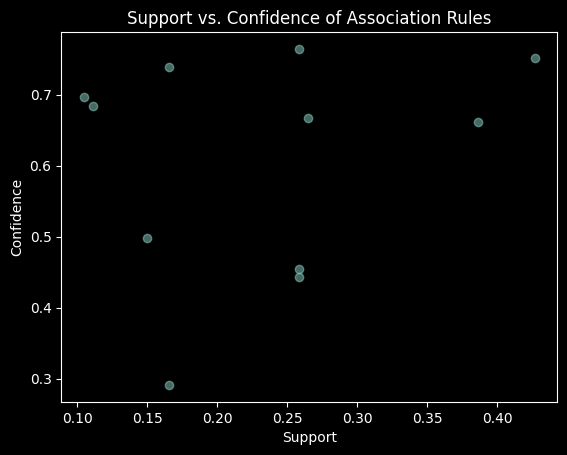

                              antecedents                consequents  \
16  (vehicle_type_3, vehicle_reference_1)  (accident_severity_False)   
11                       (vehicle_type_3)  (accident_severity_False)   
21  (vehicle_type_3, vehicle_reference_2)  (accident_severity_False)   
1                         (day_of_week_5)  (accident_severity_False)   
3                         (day_of_week_6)  (accident_severity_False)   
9                   (vehicle_reference_2)  (accident_severity_False)   
7                   (vehicle_reference_1)  (accident_severity_False)   

    antecedent support  consequent support   support  confidence      lift  \
16            0.337829            0.661035  0.258277    0.764521  1.156552   
11            0.567922            0.661035  0.426926    0.751734  1.137208   
21            0.223881            0.661035  0.165391    0.738748  1.117563   
1             0.150390            0.661035  0.104856    0.697229  1.054754   
3             0.162967           

In [73]:

sorted_rules = severity_rules.sort_values(by='lift', ascending=False)

# Display the sorted rules
print(sorted_rules)

# Rule Visualization
import matplotlib.pyplot as plt

# scatter plot of support vs. confidence
plt.scatter(sorted_rules['support'], sorted_rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence of Association Rules')
plt.show()

# Rule Evaluation
# Assuming threshold values for support, confidence, and lift
support_threshold = 0.1
confidence_threshold = 0.5
lift_threshold = 1.0

# Filter rules
filtered_rules = sorted_rules[(sorted_rules['support'] >= support_threshold) &
                               (sorted_rules['confidence'] >= confidence_threshold) &
                               (sorted_rules['lift'] >= lift_threshold)]

# Display the filtered rules
print(filtered_rules)

# insights based on the filtered rules
for index, rule in filtered_rules.iterrows():
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])
    print(f"If {antecedents} are present, then {consequents} are more likely, with a lift of {rule['lift']}")


In [74]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Dataset_Traffic.csv')
# Inspect the data
print(df.head(10))

   vehicle_index accident_index  accident_year accident_reference  \
0         681728       2.02E+12           2020           10228020   
1         681749       2.02E+12           2020           10228086   
2         681752       2.02E+12           2020           10228097   
3         681774       2.02E+12           2020           10228148   
4         681793       2.02E+12           2020           10228207   
5         681806       2.02E+12           2020           10228240   
6         681808       2.02E+12           2020           10228247   
7         681812       2.02E+12           2020           10228250   
8         681822       2.02E+12           2020           10228265   
9         681835       2.02E+12           2020           10228283   

   vehicle_reference  vehicle_type  towing_and_articulation  \
0                  1             3                        0   
1                  1             3                        0   
2                  2             3                 

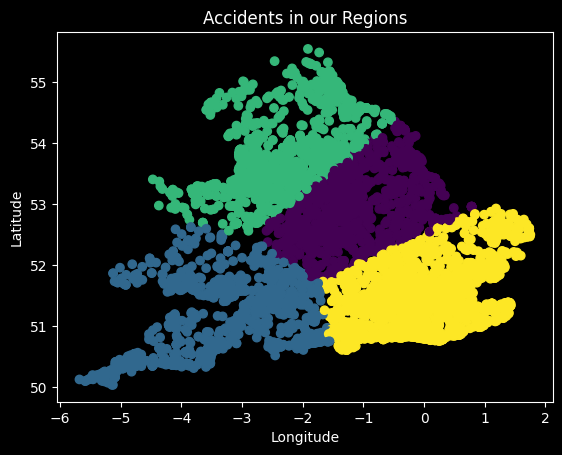

Cluster Counts:
3    8258
0    1834
2    1707
1    1400
Name: cluster, dtype: int64


In [75]:
# dataset for the specified LSOA regions
selected_regions = ['E06000010', 'E06000011', 'E06000012', 'E06000013']
filtered_df = df[df['lsoa01cd'].isin(selected_regions)]

# columns selection
clustering_df = df[['latitude', 'longitude']]

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_df)

# Apply KMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(normalized_data)

# Add the cluster labels to the DataFrame
clustering_df['cluster'] = clusters

# Visualize the clusters
import matplotlib.pyplot as plt
plt.scatter(clustering_df['longitude'], clustering_df['latitude'], c=clustering_df['cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accidents in our Regions')
plt.show()
#North Lincolnshire, North East Lincolnshire East Riding of Yorkshire  Kingston upon Hull
# Analyze the clusters
cluster_counts = clustering_df['cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)


Identified Outliers:
       vehicle_index accident_index  accident_year accident_reference  \
10            681849       2.02E+12           2020           10228301   
36            682074       2.02E+12           2020           10228691   
39            682097       2.02E+12           2020           10228738   
84            682428       2.02E+12           2020           10229453   
224           683532       2.02E+12           2020           10231463   
...              ...            ...            ...                ...   
13132         841861  202063BF00620           2020          63BF00620   
13157         842137  202063CF01320           2020          63CF01320   
13165         842283  202063D037820           2020          63D037820   
13186         842400  202063D061120           2020          63D061120   
13187         842401  202063D061120           2020          63D061120   

       vehicle_reference  vehicle_type  towing_and_articulation  \
10                     1           

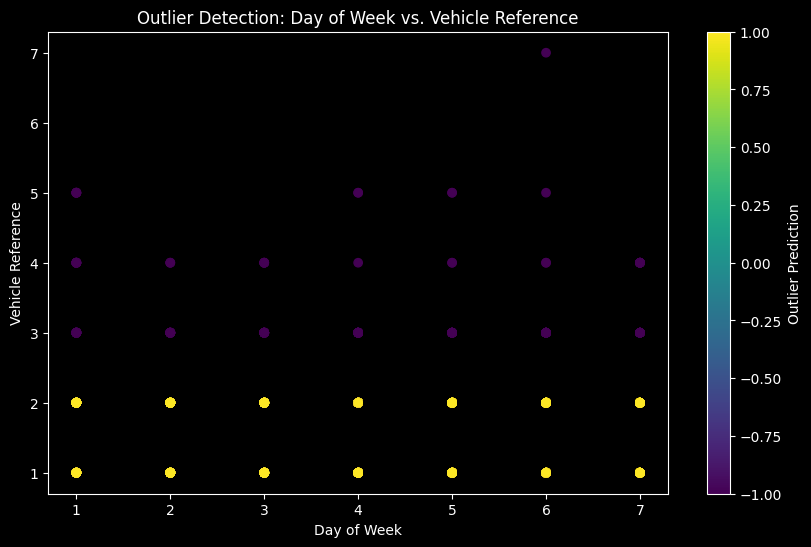

In [76]:
from sklearn.ensemble import IsolationForest

# Define features for outlier detection
features = [ 'day_of_week', 'vehicle_reference', 'vehicle_type', 'accident_severity']

# Prepare data for outlier detection
X = df[features]

# Forest model
isolation_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit  predict outliers
outlier_predictions = isolation_forest.fit_predict(X)

# Identify outliers
outliers = df[outlier_predictions == -1]

# Evaluate outliers
print("Identified Outliers:")
print(outliers)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['day_of_week'], df['vehicle_reference'], c=outlier_predictions, cmap='viridis')
plt.xlabel('Day of Week')
plt.ylabel('Vehicle Reference')
plt.title('Outlier Detection: Day of Week vs. Vehicle Reference')
plt.colorbar(label='Outlier Prediction')
plt.show()


Point7: Prediction by Classification model

In [77]:
# Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13199 entries, 0 to 13198
Data columns (total 90 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   vehicle_index                                13199 non-null  int64  
 1   accident_index                               13199 non-null  object 
 2   accident_year                                13199 non-null  int64  
 3   accident_reference                           13199 non-null  object 
 4   vehicle_reference                            13199 non-null  int64  
 5   vehicle_type                                 13199 non-null  int64  
 6   towing_and_articulation                      13199 non-null  int64  
 7   vehicle_manoeuvre                            13199 non-null  int64  
 8   vehicle_direction_from                       13199 non-null  int64  
 9   vehicle_direction_to                         13199 non-null  int64  
 10

In [78]:
#made separate dataframe w. set index that wouldnt effect data vis above
df1=df
#set index to accident_index
df1.set_index('accident_index', inplace=True)
df1.head()

,vehicle_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,casualty_type,casualty_home_area_type,casualty_imd_decile,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
accident_index,,,,,,,,,,,,,,,,,,,,,
2.02E+12,681728,2020,10228020,1,3,0,3,7,3,0,...,3,1,8,1530,E01001530,Enfield 032D,Enfield 032D,208609.7330,2561.208221,be99c0ab-0d7c-40c5-a0e1-3016ab9d1ebb
2.02E+12,681749,2020,10228086,1,3,0,18,7,3,9,...,0,1,2,3186,E01003186,Lambeth 007D,Lambeth 007D,208729.0965,2883.873114,b8fda99d-473d-4560-9e66-4f8e0c549b2b
2.02E+12,681752,2020,10228097,2,3,0,18,1,5,0,...,3,1,6,4761,E01004761,Westminster 018D,Westminster 018D,520077.0227,5894.348387,72d36791-acaf-4bec-8c86-cbd1c6f34feb
2.02E+12,681774,2020,10228148,1,3,0,14,5,1,0,...,0,-1,-1,635,E01000635,Brent 020D,Brent 020D,232499.6729,2873.438850,cb76b7be-f085-4993-b597-992b0e048d4b
2.02E+12,681793,2020,10228207,1,3,0,99,9,9,99,...,3,1,7,3371,E01003371,Merton 005D,Merton 005D,120972.1519,2196.995201,ced02963-a705-4762-90ef-4d841d8a9d13


In [79]:
# Replace values in the accident_severity column
df1['accident_severity'] = df1['accident_severity'].replace({3: 0, 1: 1, 2: 1})

# Transform values to True and False
df1['accident_severity'] = df1['accident_severity'].map({0: 'Not Severe', 1: 'Severe'})

# Display the updated DataFrame
print(df1['accident_severity'])

accident_index
2.02E+12         Not Severe
2.02E+12         Not Severe
2.02E+12         Not Severe
2.02E+12         Not Severe
2.02E+12         Not Severe
                    ...    
202063D065020        Severe
202063D065020        Severe
202063D070420    Not Severe
202063D080920        Severe
202063D084820        Severe
Name: accident_severity, Length: 13199, dtype: object


In [80]:
#separate dtypes
notif=df1.select_dtypes(exclude=['int','float','int64'])
intfldtypes = df1.select_dtypes(include=['int','float','int64'])
print('Objects',notif.columns)
print("\nNonObjects",intfldtypes.columns)

#checking to make sure all are accounted for
print(df1.shape)
print(notif.shape)
print(intfldtypes.shape)

Objects Index(['accident_reference', 'generic_make_model', 'accident_index.1',
       'accident_reference.1', 'accident_severity', 'date', 'time',
       'local_authority_ons_district', 'local_authority_highway',
       'lsoa_of_accident_location', 'accident_index.2', 'accident_reference.2',
       'lsoa01cd', 'lsoa01nm', 'lsoa01nmw', 'globalid'],
      dtype='object')

NonObjects Index(['vehicle_index', 'accident_year', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'drive

In [81]:
# Unique values of Accident_severity
df1['accident_severity'].unique()
df1['accident_severity'].unique()

array(['Not Severe', 'Severe'], dtype=object)

In [82]:
#label encode objects
obj_le= notif.apply(LabelEncoder().fit_transform)
#re-add with non-objects
df_ml= pd.concat([obj_le,intfldtypes], axis=1, sort=False)
#check shape
print(df_ml.shape)

(13199, 89)


In [83]:
#Set up of X and Y
X= df_ml.drop(['accident_severity'],axis=1)
y= df_ml['accident_severity']

In [84]:
# setting up testing and training sets
res_X_train, res_X_test, res_y_train, res_y_test = train_test_split(X, y,
                                                                    test_size=0.25, random_state=27)
# concatenate our training data back together
res_X = pd.concat([res_X_train, res_y_train], axis=1)

# separate minority and majority classes
not_severe = res_X[res_X.accident_severity==0]
severe = res_X[res_X.accident_severity==1]

In [85]:
# decrease majority
not_severe_decreased = resample(not_severe,
                          replace=True, # sample with replacement
                          n_samples=len(severe), # match number in majority class
                          random_state=27) # reproducible results

In [86]:
# combine majority and severe_increased minority
newdf = pd.concat([severe, not_severe_decreased])
newdf.accident_severity.value_counts()

1    3356
0    3356
Name: accident_severity, dtype: int64

In [87]:
res_X_train = newdf.drop('accident_severity', axis=1)
res_y_train = newdf.accident_severity

In [88]:
!pip install kmodes
from kmodes.kmodes import KModes

In [89]:
# "clustering" using kmode algorithm that is designed to handle mixed data
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1)
fitClusters_huang = km_huang.fit_predict(newdf)
fitClusters_huang

array([0, 0, 0, ..., 0, 1, 1], dtype=uint16)

In [90]:
newdf1 = newdf.copy().reset_index()
clustersDf = pd.DataFrame(fitClusters_huang)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([newdf1, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index'], axis = 1)
combinedDf.head()

,accident_index,accident_reference,generic_make_model,accident_index.1,accident_reference.1,date,time,local_authority_ons_district,local_authority_highway,lsoa_of_accident_location,...,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,objectid,shape__area,shape__length,accident_severity,cluster_predicted
0,2.02E+12,9547,123,0,9547,352,538,135,135,5725,...,0,0,3,1,2,24241,8.940533e+05,5606.732856,1,0
1,2.02E+12,4650,165,0,4650,3,1027,291,92,22,...,0,0,3,1,2,75,5.174457e+05,3279.449203,1,0
2,2.02E+12,8432,162,0,8432,170,158,202,143,6691,...,0,0,5,1,9,28795,5.554451e+07,47576.224640,1,0
3,20201377I0514,5405,0,241,5405,114,1081,286,87,2978,...,0,0,5,3,6,10916,6.741876e+05,4921.123668,1,1
4,202060Y136460,11292,0,713,11292,80,480,325,153,7439,...,0,0,5,-1,-1,32539,1.964889e+08,89996.550150,1,0


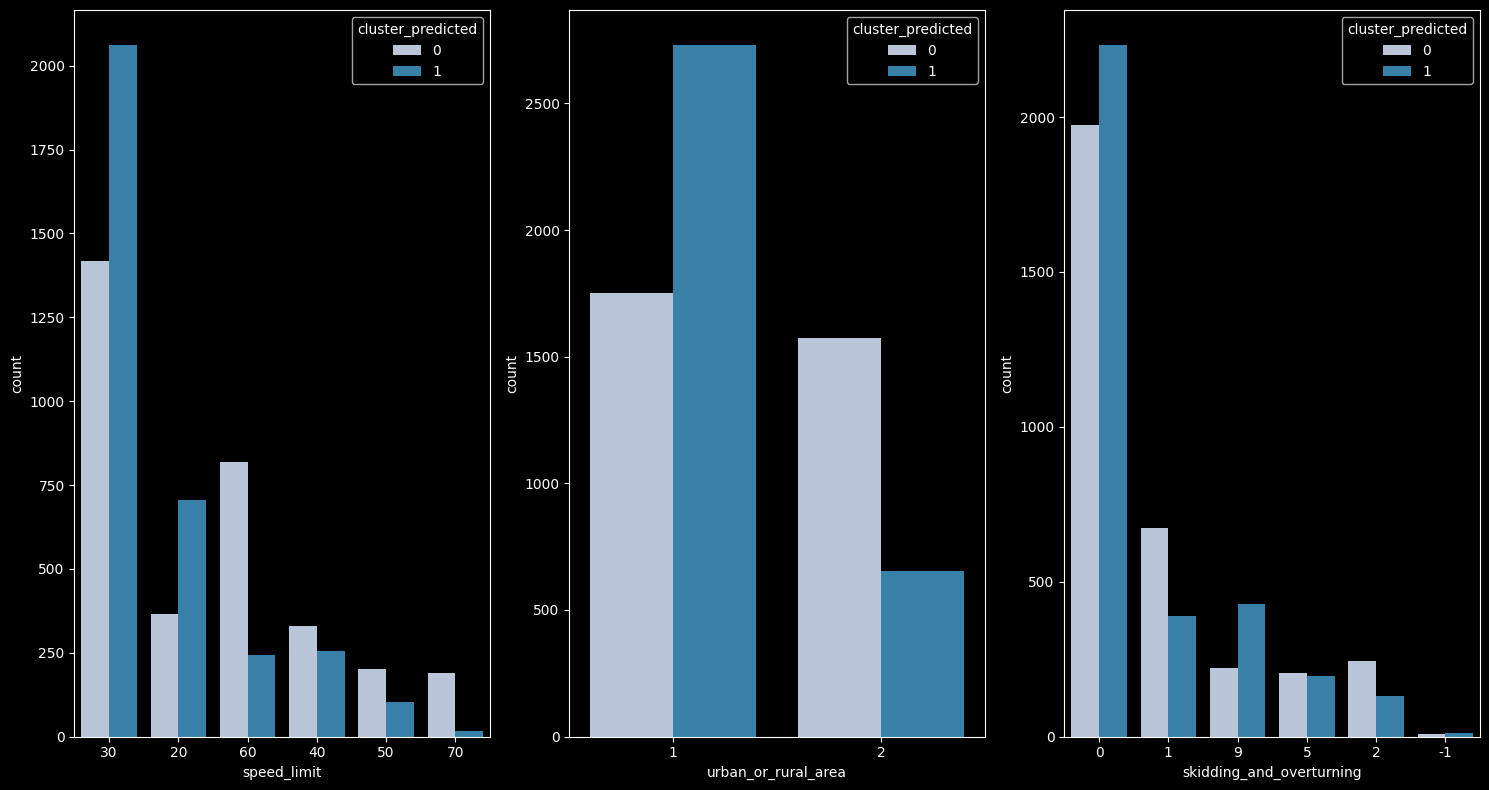

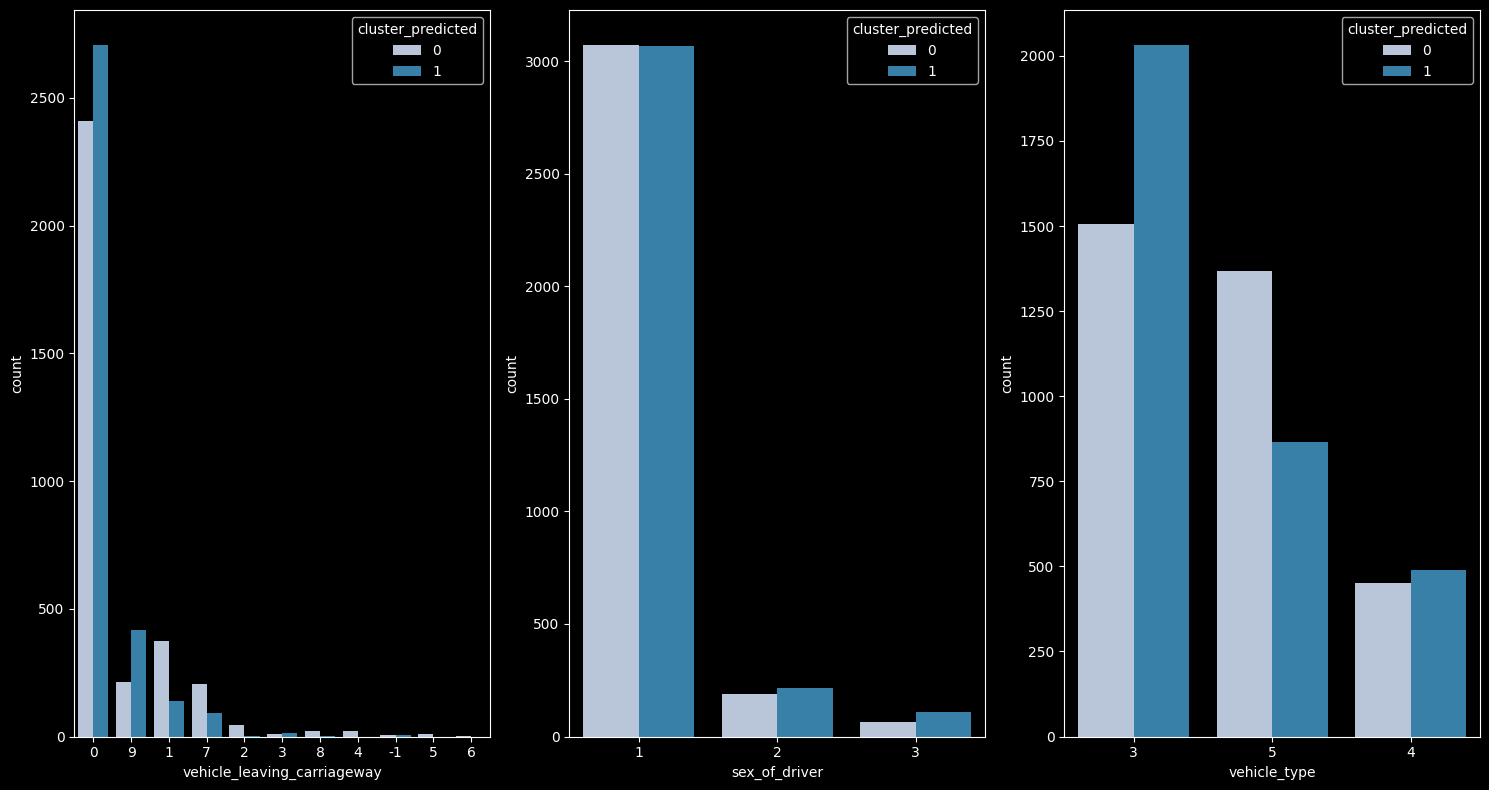

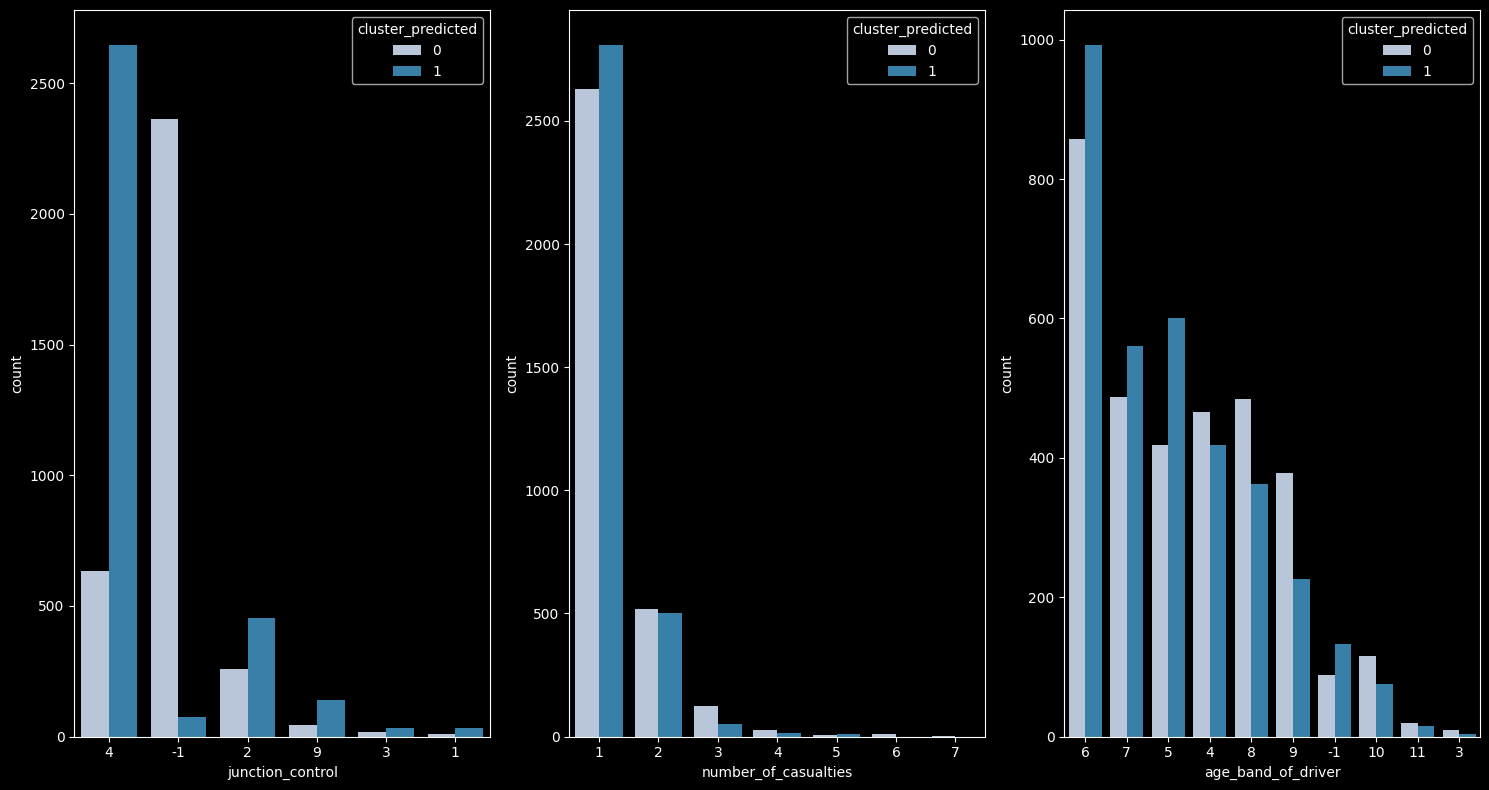

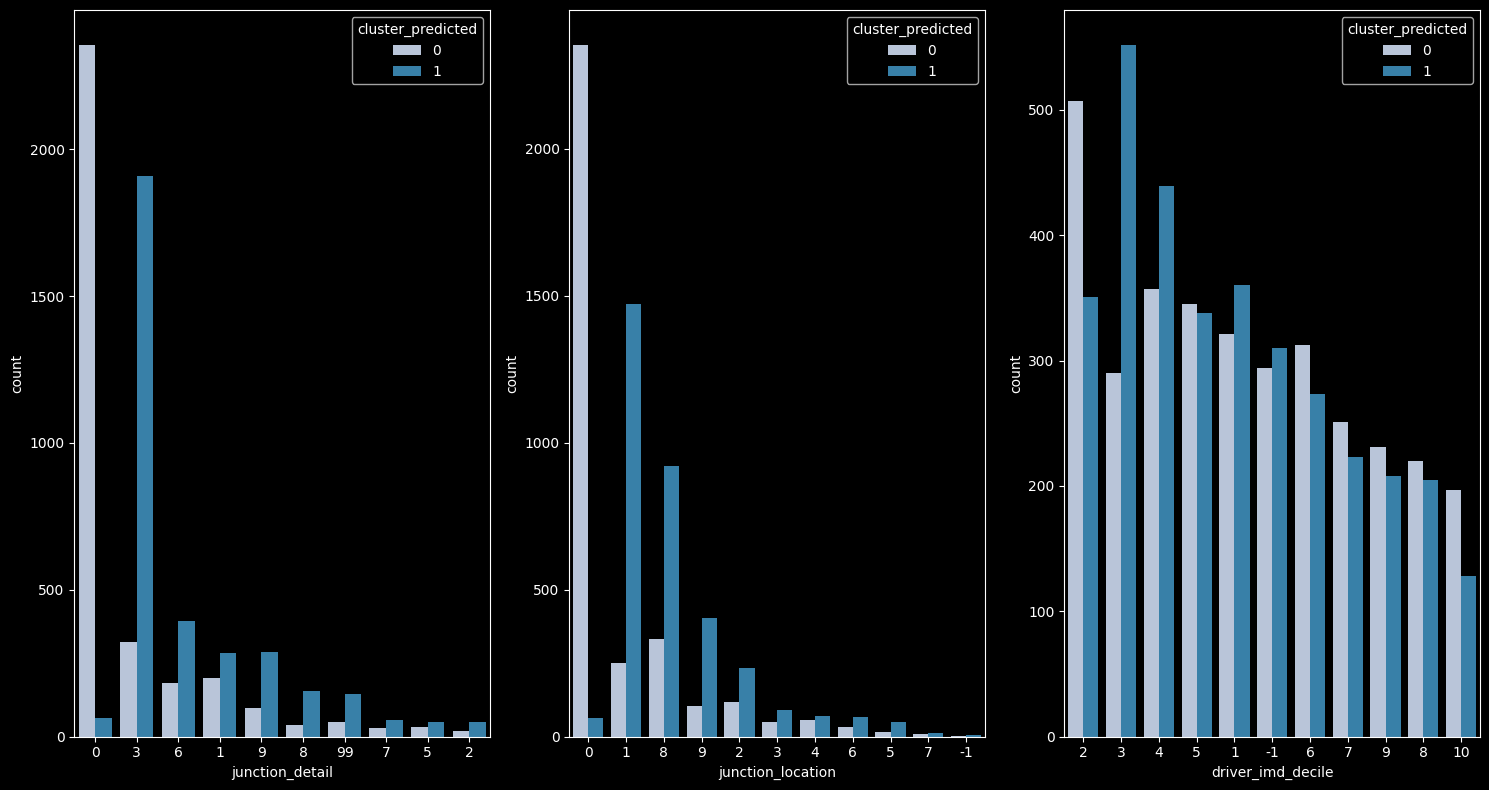

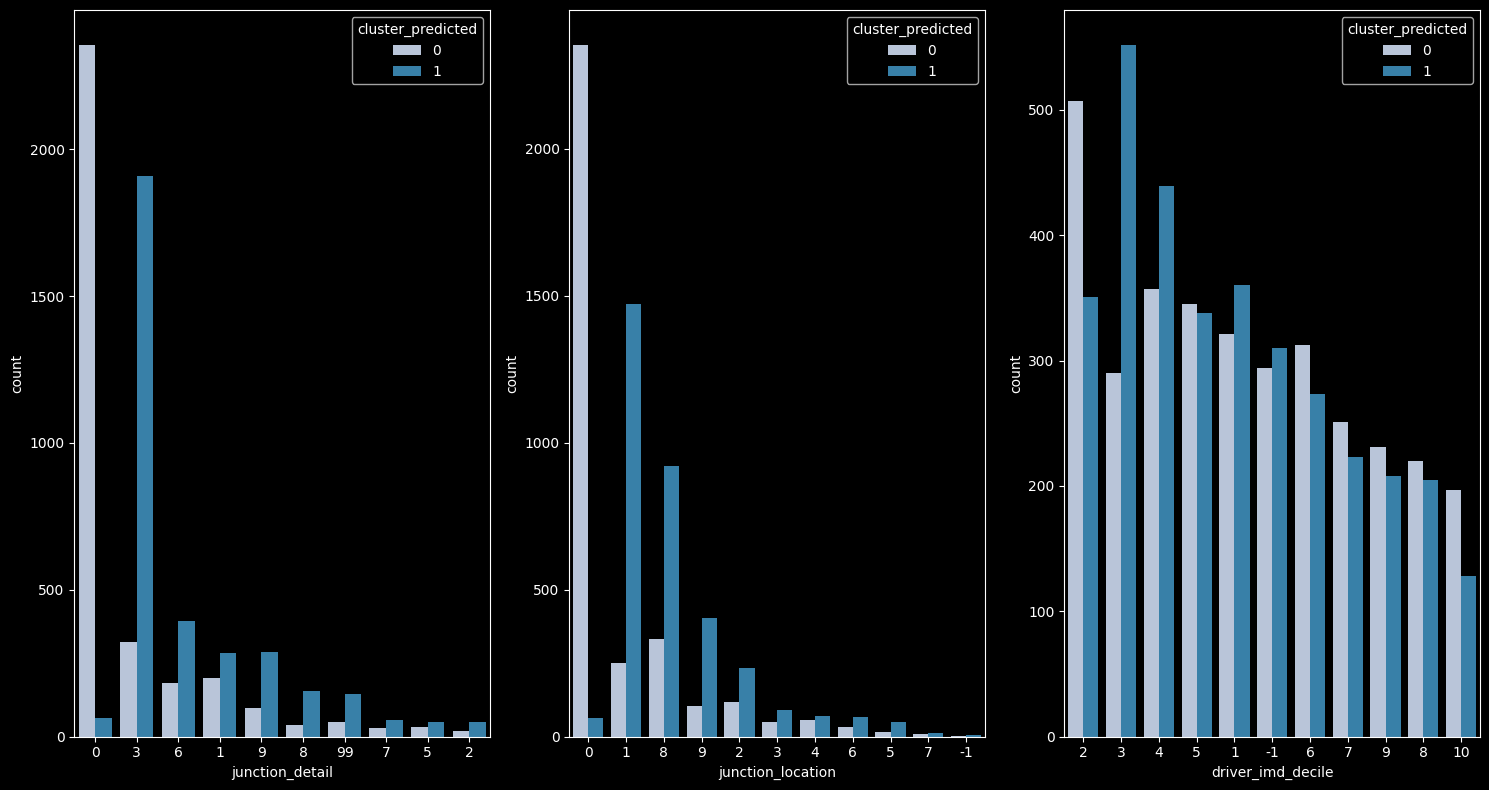

In [91]:
#plotting a few of these features just to see how they relate to the clustering for seriousness


f, axs = plt.subplots(1,3,figsize = (15,8))

sns.countplot(x=combinedDf['speed_limit'],
              order=combinedDf['speed_limit'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[0])
sns.countplot(x=combinedDf['urban_or_rural_area'],
              order=combinedDf['urban_or_rural_area'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[1])
sns.countplot(x=combinedDf['skidding_and_overturning'],
              order=combinedDf['skidding_and_overturning'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[2])
plt.tight_layout()
plt.savefig('clusterplot1.png')
plt.show()



f, axs = plt.subplots(1,3,figsize = (15,8))

sns.countplot(x=combinedDf['vehicle_leaving_carriageway'],
              order=combinedDf['vehicle_leaving_carriageway'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[0])
sns.countplot(x=combinedDf['sex_of_driver'],
              order=combinedDf['sex_of_driver'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[1])
sns.countplot(x=combinedDf['vehicle_type'],
              order=combinedDf['vehicle_type'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[2])
plt.tight_layout()
plt.savefig('clusterplot2.png')
plt.show()


f, axs = plt.subplots(1,3,figsize = (15,8))

sns.countplot(x=combinedDf['junction_control'],
              order=combinedDf['junction_control'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[0])
sns.countplot(x=combinedDf['number_of_casualties'],
              order=combinedDf['number_of_casualties'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[1])
sns.countplot(x=combinedDf['age_band_of_driver'],
              order=combinedDf['age_band_of_driver'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[2])
plt.tight_layout()
plt.savefig('clusterplot3.png')
plt.show()



f, axs = plt.subplots(1,3,figsize = (15,8))

sns.countplot(x=combinedDf['junction_detail'],
              order=combinedDf['junction_detail'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[0])
sns.countplot(x=combinedDf['junction_location'],
              order=combinedDf['junction_location'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[1])
sns.countplot(x=combinedDf['driver_imd_decile'],
              order=combinedDf['driver_imd_decile'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[2])
plt.tight_layout()
plt.savefig('clusterplot4.png')
plt.show()


f, axs = plt.subplots(1,3,figsize = (15,8))

sns.countplot(x=combinedDf['junction_detail'],
              order=combinedDf['junction_detail'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[0])
sns.countplot(x=combinedDf['junction_location'],
              order=combinedDf['junction_location'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[1])
sns.countplot(x=combinedDf['driver_imd_decile'],
              order=combinedDf['driver_imd_decile'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[2])
plt.tight_layout()
plt.savefig('clusterplot5.png')
plt.show()

In [92]:
#confusion matrix plot function
def cm_plot(var):
    plt.figure(figsize=(15,5))
    plt.style.use('dark_background')
    plt.clf()
    plt.imshow(var, interpolation='nearest', cmap='tab20')
    classNames = ['No Loyalty','Loyalty']
    plt.title('Confusion Matrix')
    plt.ylabel('Actual\n')
    plt.xlabel('Predicted\n')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+"="+str(var[i][j]),horizontalalignment='center',
                     color='black')
    plt.show()





BaggingClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 97.9394%
Cross validation scores: 0.9743741651529394
Log Loss: 0.04795677825874383


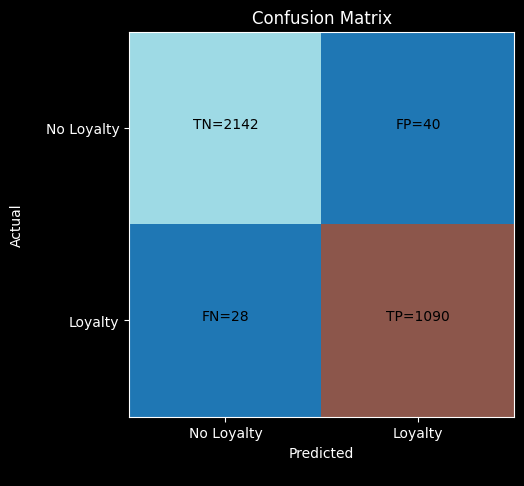





AdaBoostClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 97.5152%
Cross validation scores: 0.9666268243792718
Log Loss: 0.48331169901592264


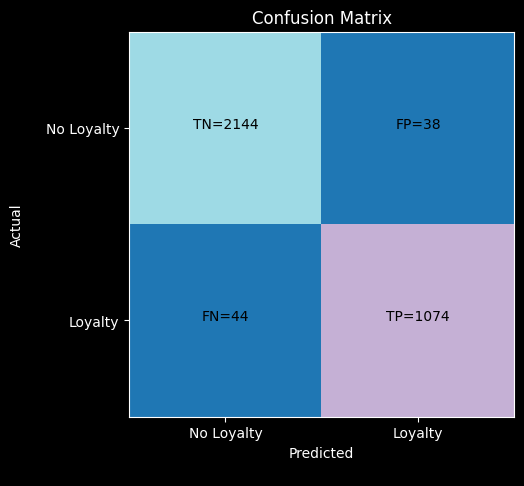





RandomForestClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 97.8788%
Cross validation scores: 0.9736293860306175
Log Loss: 0.04804274083206037


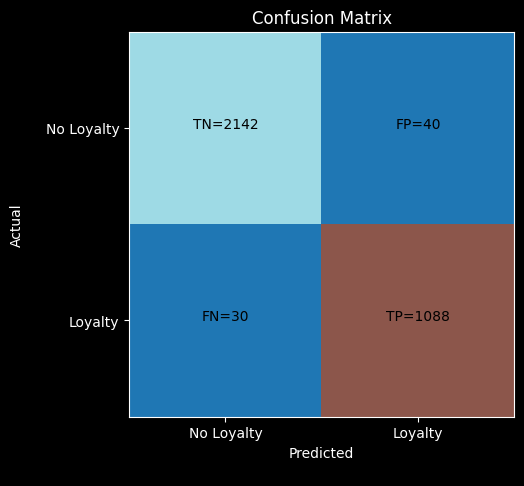

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Number of positive: 3356, number of negative: 3356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7385
[LightGBM] [Info] Number of data points in the train set: 6712, number of used features: 83
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
#Try modeling using  different classification models
classifiers = [
    BaggingClassifier(max_features=X.shape[1], n_estimators=500, random_state=42),
    AdaBoostClassifier( n_estimators=500, learning_rate=0.05, random_state=42),
    RandomForestClassifier(criterion='entropy', max_depth=40,max_features=X.shape[1],
                           min_samples_split=8, n_estimators=500, random_state=42),
    LGBMClassifier(learning_rate =0.03, max_depth=40, min_data_in_leaf=10,
                   n_estimators=500, num_leaves=50, random_state = 42),
    XGBClassifier(learning_rate=0.05, n_estimators=500, subsample= 1,random_state = 42,
                        gamma = 1, max_depth=40)]




#putting results in df
res_cols=["Classifier", "Accuracy", "Log Loss", "Cross Val", "Recall", "Roc Auc","F1",
          "False Positive Rate", "Error Rate"]
results = pd.DataFrame(columns=res_cols)

for clf in classifiers:
    clf.fit(res_X_train, res_y_train)
    name = clf.__class__.__name__

    print("\n"*3)
    print(name,"Results:")

    print('~'*40)
    y_pred = clf.predict(res_X_test)
    acc = accuracy_score(res_y_test, y_pred)
    print("Accuracy: {:.4%}".format(acc))

    cv= np.mean(cross_val_score(clf, res_X_train, res_y_train, cv=3))
    print("Cross validation scores:",cv)


    train_predictions = clf.predict_proba(res_X_test)
    logloss = log_loss(res_y_test, train_predictions)
    print("Log Loss: {}".format(logloss))

    cm = confusion_matrix(res_y_test, y_pred)

    cm_plot(cm)

    #FPR and Error Rate setup
    tn, fp, fn, tp = confusion_matrix(res_y_test,y_pred).ravel()

    fpr = fp/(tn+fp)
    ers = 1-acc
    rec= recall_score(res_y_test, y_pred)
    roc=roc_auc_score(res_y_test, y_pred)
    f1s=f1_score(res_y_test, y_pred)
    results_final = pd.DataFrame([[name, round(acc*100,3), round(logloss,3),
                                   round(cv*100,3), round(rec*100,3), round(roc*100,3),
                                   round(f1s*100,3),round(fpr*100,3),round(ers*100,3)]],
                                 columns=res_cols)
    results = results.append(results_final)
